# **Exploration of Voter Registration Data in 2016 and 2020:**

The dataset we will be working is [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv).

Here is more [info](https://github.com/fivethirtyeight/data/tree/master/voter-registration) on the origins of the data & the [article](https://fivethirtyeight.com/features/voter-registrations-are-way-way-down-during-the-pandemic/) behind the story.

# **Introduction**


This project serves to visualize and analyze voter registration in 2016 and 2020. The goal of this project is to analyze data from 11 different states along with Washington D.C., and identify any trends in voter registration in these parts of the United States. This notebook gives insights on how and if voting regsitration has changed from the 2016 to 2020 elections across different months and if there are any patterns nationally or state wide. This information provided by this notebook helps us understand voter regsitration patterns and shifts in voter turnout. In addition, this analysis may be helpful to assess policy impacts and improve voter engagement.

**Research Questions**

National Trend

1. Comparing the different election years data: 2016 vs 2020, how did the average of new registered voters change over the months of January to May? Was there any significant differences in new voter rgeistration between the two years?

State Trend

2. How did the patterns of new voter registrations from January to April of 2020 in Arizona and Georgia compare given that these two states who historically lean Republican  had a shift toward Democratic support in the 2020 election?.

# **Loading Libraries & Data**
First we need to load all necessary libraries needed and the data to do our analysis:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

# **Data Processing**


To understand our data more lets look at the first five rows of data:

In [4]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


**Jurisdiction:** This is the state in which the data is from. There are 11 total states and Washington D.C.

**Year:** This represents the year in which the data is from: either 2016 or 2020.

**Month:** This shows what month the data is from. All 12 juridcitions has data from January to April and five jurisdictions has data from January to May.

**New registered voters:** This shows how many new people registered to vote for each state, month, and year.



### Check for missing data:

In [5]:
voters.isnull().values.any()

False

There is **no missing data** in this data frame.

### Check the data types:

In [6]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Jurisdiction and Month are **objects**.

Year and New registered voters are **int64** (numeric).

### Renaming Columns:

In [7]:
voters = voters.rename(columns={"Jurisdiction": "NAME", "New registered voters": "registered_voters"})

In [8]:
print(voters.columns)

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')


I renamed the "Jurisdiction" column to **"NAME"** and the "New registered voters" column to **"registered_voters"** for **simplicity** purposes when using it throughout the notebook.

In [9]:
voters.NAME.value_counts()
# This shows the different states in the data set, which is a small portion of the United States.

,count
NAME,
District of Columbia,10
Maryland,10
North Carolina,10
Texas,10
Virginia,10
Arizona,8
California,8
Colorado,8
Delaware,8


### Limitations:

There are limations to the data that should be discussed. One limitation is that voting information is only provided for 11 states and Washington, D.C. This is a small portion of the United States, therefore this data is **not generalizable** of the country. Also, there are no population sizes provided for each state; this information may give more insight into the number of registered voters in that state and better allow researchers to compare across different states. Data is also only provided for the earlier part of the year; data is not provided for May-Decemmber which is closer to when the elction falls (only some jurisdictions have info for May).

# **Exploratory Data Analysis**

In [10]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In February, 2020 **California** had the highest amount of new voter registration of **238,281** new voters, exceeding the registration numbers for any other month, year, or state within this data set.

In [11]:
avg_voters = voters["registered_voters"].mean()
print(avg_voters)

48223.46226415094


Across all 11 states and Washington D.C., during select months in 2016 and 2020, there was an average of **48,223** new voter registrations.

In [12]:
high_voters = voters.loc[voters["registered_voters"] > avg_voters]
print(high_voters)

              NAME  Year Month  registered_voters
1          Arizona  2016   Feb              51155
2          Arizona  2016   Mar              48614
5          Arizona  2020   Feb              50853
8       California  2016   Jan              87574
9       California  2016   Feb             103377
10      California  2016   Mar             174278
11      California  2016   Apr             185478
12      California  2020   Jan             151595
13      California  2020   Feb             238281
14      California  2020   Mar             176810
42         Florida  2016   Jan              50231
43         Florida  2016   Feb              87351
44         Florida  2016   Mar              73627
45         Florida  2016   Apr              52508
46         Florida  2020   Jan              77466
47         Florida  2020   Feb             109859
48         Florida  2020   Mar              54872
55         Georgia  2020   Feb              55386
59        Illinois  2016   Feb              99674


In [13]:
print(len(high_voters))
print(len(voters))

36
106


A new dataframe was created, called **"high voters"** which includes only instances where the number of new voter registratios exceeded the average of 48,223. This occured **36** times out of the the 106 data points.

In [14]:
high_voters.groupby("NAME")["registered_voters"].count()

,registered_voters
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


To understand **state level differences** in voter registration, the frequency with which each state **surpassed** the **national average** for new voter registration was investigated here.
For example, Arizona exceeded the national average 3 times, California did 7 times and so on.

In [15]:
avg_state = voters.groupby("NAME")["registered_voters"].mean()
# this code calculates the average voter registration per state
top_3_states = avg_state.sort_values(ascending=False).head(3)
print(top_3_states)

NAME
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64


To determine which **states** had the **highest** levels of voter registration, the average number of new registrations was calculated by each states, with the **top 3** states ranked accordingly.

# **Data Visualizations**

### Examining total new registered voters per state:


In [16]:
total_per_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()
total_per_state["NAME"]= total_per_state["NAME"].replace({"District of Columbia": "DC", "Maryland": "MD", "North Carolina": "NC",
                                                          "Texas": "TX", "Virginia": "VA", "Arizona": "AZ", "California": "CA", "Colorado": "CO", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Illinois": "IL"})

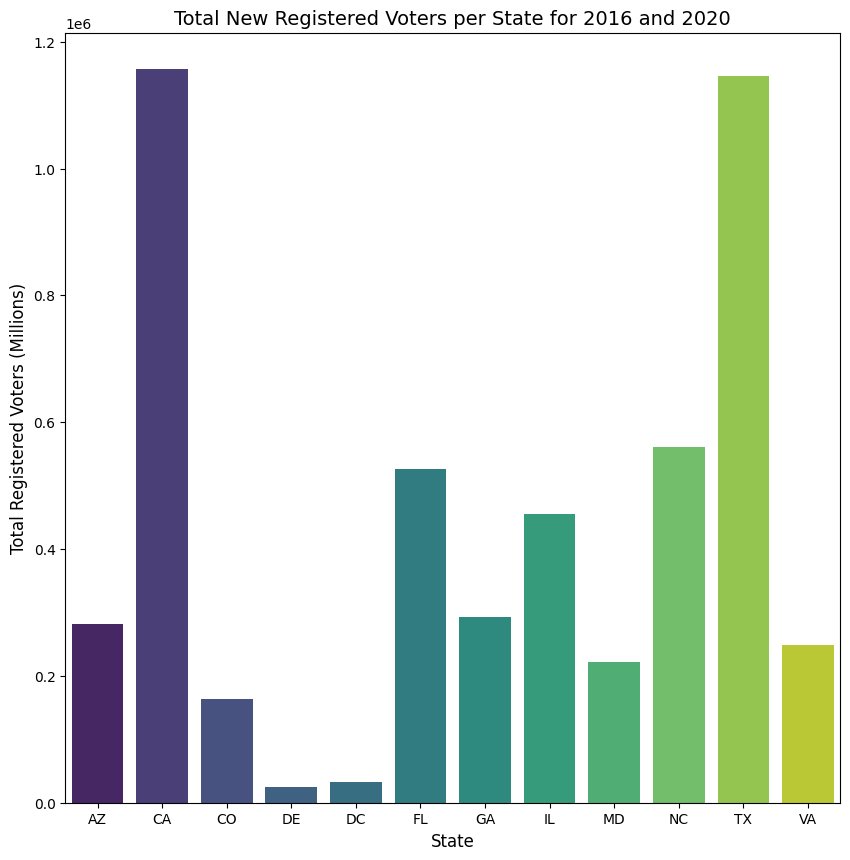

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(total_per_state, x="NAME", hue="NAME", y="registered_voters", palette="viridis")
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Registered Voters (Millions)", fontsize=12)
plt.title("Total New Registered Voters per State for 2016 and 2020", fontsize = 14)
plt.show()

This bar plot displays the total new voter registration per state for the years 2016 and 2020. **California** and **Texas** overall had the **highest** amount of new registered voters both nearing **1.2 million** new registered voters. Whereas, **Delaware** and **Washington D.C,** has the **lowest** total new registered voters from 2016 and 2020, with **under** **100,000** new registered voters. This difference could be due to the significant **population differences** in these areas. Overall, there is significant variation in total voter registration across the different states.

### Comparing voter registation in 2016 and 2020:

**Question 1**: Comparing the different election years data: 2016 vs 2020, how did the average of new registered voters change over the months of January to May? Was there any signficant differences in new voter registration between the two years?

Text(0.5, 1.0, 'Average Registered Voters for States in the US')

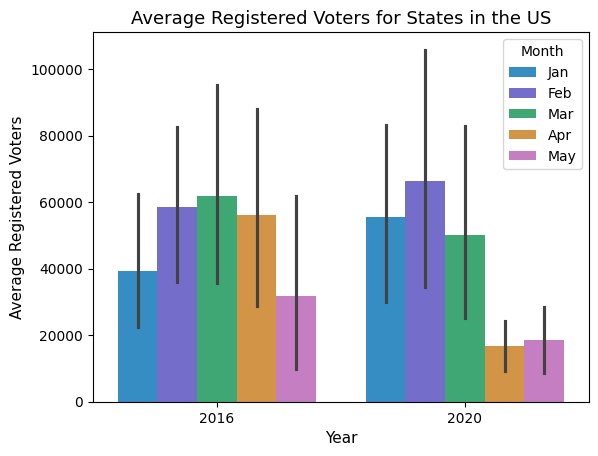

In [18]:
colors =["#1F92DA", "#685DDA", "#2DB874", "#E9962F", "#D172CD"]
sns.barplot(voters, x="Year", y="registered_voters", hue= "Month", palette=colors)
plt.xlabel("Year", fontsize = 11)
plt.ylabel("Average Registered Voters", fontsize = 11)
plt.title("Average Registered Voters for States in the US", fontsize = 13)

To compare voter registration in 2016 and 2020, the average registered voters for each month are examined in this bar plot. In **both** 2016 and 2020, voter registration numbers appears to be **higher** in **earlier** **months** (January, February, March) compared to April and May. Therefore, 2016 data appears to be **normally distributed**. In **2016**, there was **more** new voter registration in the months of April and May compared to 2020 where there was a **steep** **decline**, which is *not* normally distributed like 2016 data. Since data from May is not provided for every state, we can say that is probably why May has lower registered voters. However, it is interesting that **April** has signficantly **less** new registered voters in **2020**.

### Florida vs Georgia Voter Registration in 2020:
**Question 2:**  How did the patterns of new voter registrations from January to April of 2020 in Arizona and Georgia compare given that these two states who historically lean Republican  had a shift toward Democratic support in the 2020 election.

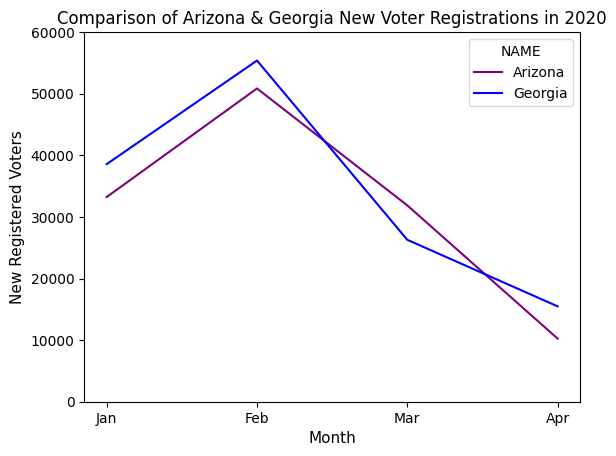

In [19]:
voters_2020 = voters[voters["Year"] ==2020].copy()
florida_georgia = voters_2020[voters_2020["NAME"].isin(["Arizona", "Georgia"])]
sns.lineplot(florida_georgia, x = "Month", y = "registered_voters", hue="NAME", palette={"Arizona": "purple", "Georgia": "blue"})
plt.ylim (0, 60000)
plt.xlabel("Month", fontsize = 11)
plt.ylabel("New Registered Voters", fontsize = 11)
plt.title("Comparison of Arizona & Georgia New Voter Registrations in 2020")
plt.show()

Both states experienced a **rise** in voters from **January** to **Feburary**, whereas after February, registration numbers took a **drop** in both states. The increased registrations earlier in the year could reflect early campaigning or growing political awareness, though we don't know who registered and the demorgapic data of new registered voters. Overall, both states show similar trends in the amount of new registered voters over the select months.  

# **Mapping**

### Load in shape file data:

In [20]:
!pip install gitpython
!git clone https://github.com/SFord87/325-Datasets
shapefile = "/content/325-Datasets/cb_2018_us_state_500k.shp"
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.81 MiB/s, done.
Resolving deltas: 100% (13/13), done.


### Set bounding box:


In [21]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

To focus on voter registration data within the continental US, a bounding box defines geographical boundaries using longitude and latitude coordinates, which will be used for subsequent analysis.

### Lets create a dataframe that shows the average voter registration per state:

In [22]:
state_avg = voters.groupby("NAME")["registered_voters"].mean().reset_index()
print(state_avg)

                    NAME  registered_voters
0                Arizona          35311.500
1             California         144545.375
2               Colorado          20527.500
3               Delaware           3166.375
4   District of Columbia           3248.400
5                Florida          65868.125
6                Georgia          36604.125
7               Illinois          56840.375
8               Maryland          22133.500
9         North Carolina          56040.800
10                 Texas         114610.100
11              Virginia          24845.200


### Merge the above dataframe results with the mapping data:


In [23]:
state_avg = bbox.merge(state_avg, on="NAME", how="inner")
state_avg.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.8
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.2


To visualize voter registration patterns on a map, we need to combine the geographical data of the continental US with the average voter registration for each state.

### Average Registered Voters on US Map:


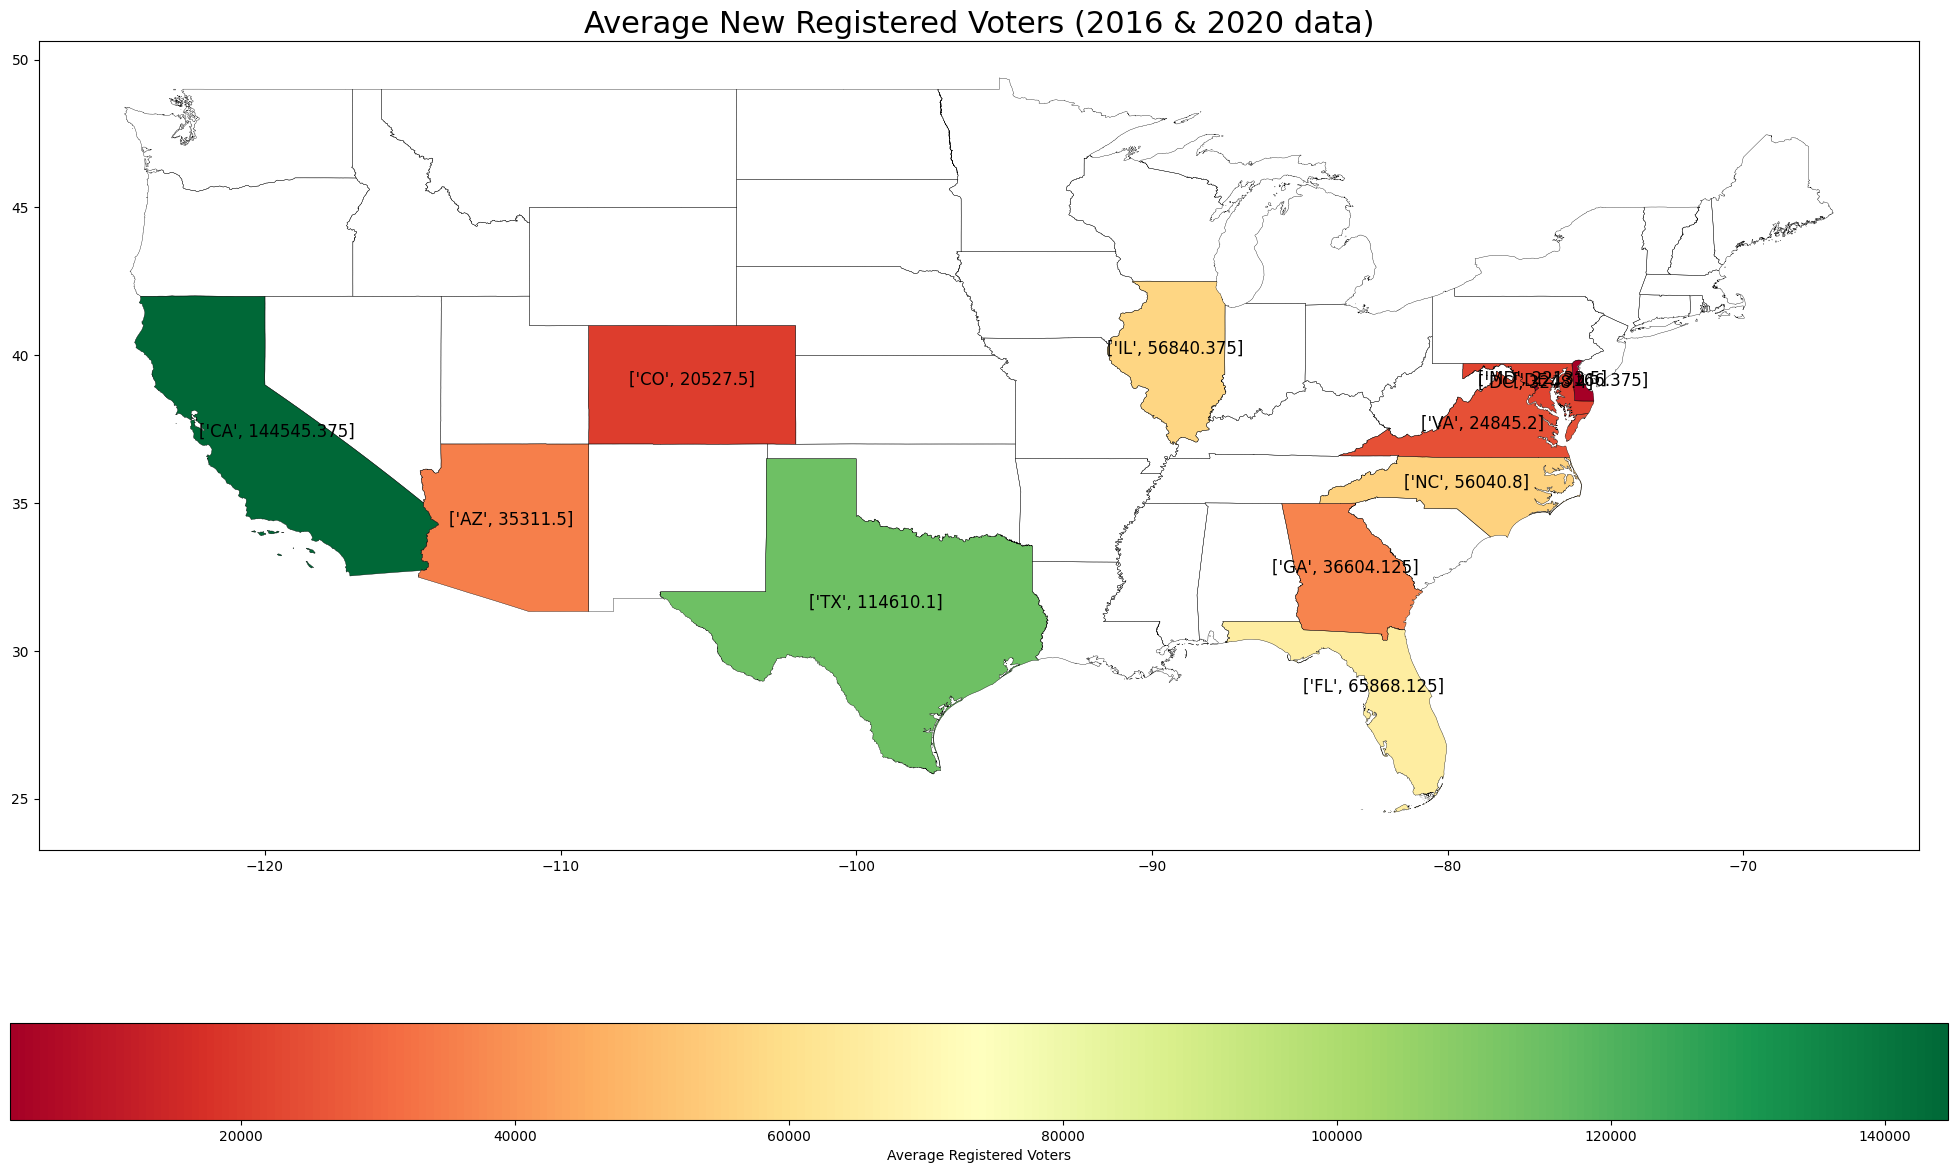

In [24]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot()

bbox.boundary.plot(ax=ax, color="black", linewidth=0.25)
state_avg.apply(lambda x: ax.annotate(text= [x.STUSPS, x.registered_voters],
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center", fontsize=12),axis=1)
state_avg.plot(column="registered_voters", ax=ax, legend=True,cmap="RdYlGn",
               legend_kwds={"label": "Average Registered Voters",
               "orientation": "horizontal"})
plt.title("Average New Registered Voters (2016 & 2020 data)", fontsize =22)
plt.show()


This map provides a clear visual representation of voter registration patterns, highlighting the average number of new voter registrations for each state. States with *higher* average registrations are shown in shades of **green**, while states with *lower* averages are shown in shades of **red**. **Texas** and **California** are depicted in shades of green which indicates a *higher* average of new registered voters. **Delaware** and **Colorado** have *lower* registered numbers, shown in shades of red. **Florida** sits in the middle of the range, depicted in a **yellow** shade on the map.

# **Conclusions & Future Research**



**Insights:**
This notebook analyzed the differences in new voter registration over select months in 2016 and 2020 for a small sample of the United States. In general, new voter registration numbers are higher in earlier months (January-March), specifically in 2020. This is illustrated in the graph: Average Registered Voters for States in the US. Additionally, when looking at the line graph: Comparison of Arizona & Georgia New Voter Registrations in 2020, we can see a rise of new registered voters in January and February, where as the numbers dropped off after Febuary. This trend could be due to the COVID-19 outbreak in 2020. In addition, more populated states such as Texas and California, have higher numbers of new registered voters and lower populated states have lower numbers, such that in February, 2020 **California** had the highest amount of new voters of **238,281**. This is also seen in the bar graph: Total New Registered Voters per State for 2016 and 2020 and the map: Average Registered Voters (2016 and 2020 data)

**Suggestions:**
Given that new voter registration declined after March in both 2016 and 2020, I would suggest examining awareness campaigns that were used before this period and also focus on demographics with observed lower registration rates. It is important to recognize the pandemics influence on the  steeper drop in registered voters in 2020 as a result of closings, lockdowns, and social distancing. Accordingly, it is important to ensure the ability to register to vote remains accessible to anyone that is eligible, as well as exploring areas where it is not as accessible to ensure voter participation even beyond the pandemic to strengthen democracy.

**Next Steps:**
Gathering more data to include in this analysis of new voter registration in the United States will be helpful in answering our research questions more completely. For instance, including data for the rest of the states within the United States will help understand voter regsitration of the United States more thoroughly, as well as collecting data for the full year would help make better conclusions. It would be interesting to explore voter registraion between Republican and Democratic states to see the influence political affiliation may have on certain election years to undertstand factors driving voter registration numbers. Specifically, to explore our second research question more, collecting demographic information of the voters to see if states like Arizona and Georgia for example, who were historically more Republican and switched after the 2020 election, differ in new voter registration. Also including data from past presidential elections prior to 2016 and including 2024 election data can better explore changes in voter registration over time and compare to 2020 to evaluate potential differences caused by COVID-19. Lastly, to address one of the limitations, future research should include voter registration in terms of proportions to the states popualtion size to compare across states more accurately.

### **Github Link:**

https://github.com/spawelc1/325-Midterm.git

# **Academic Integrity Statement**

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Sydney Pawelczyk